# Experiment

## Introduction

1. Generate a random solvable state and define the goal state.
2. Implement A\* search with the two heuristics.
3. Run 100 random tests for each heuristic.
4. Measure memory usage (expanded nodes) and runtime.
5. Compute mean and standard deviation.




In [43]:
import time
import psutil
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from puzzle.board import Board
from puzzle.solver import Solver
from puzzle.heuristics import manhattan_distance, hamming_distance

## Measure Performance

Measures the performance of solving the 8-puzzle using a specified heuristic.

This function calculates the computation time and memory usage required to solve the puzzle using the given heuristic. It initializes the solver with the provided board and heuristic, executes the solver and then measures the time taken and memory consumed during the process.


In [44]:
def measure_performance(heuristic, board):
    """
    Parameters:
    heuristic (function): The heuristic function to be used (e.g., manhattan_distance, hamming_distance).
    board (Board): The current state of the 8-puzzle board.

    Returns:
    tuple: A tuple containing the computation time (in seconds) and memory usage (number of expanded nodes).
    """
    start_time = time.time()

    solver = Solver(board, heuristic)
    _, expanded_nodes = solver.solve()

    end_time = time.time()

    computation_time = end_time - start_time

    return computation_time, expanded_nodes

## Run Experiment

The `run_experiment` function performs the following tasks:

1. Initializes a dictionary to store the results for two heuristics: `manhattan_distance` and `hamming_tiles`.
2. Runs 100 iterations where:
   - A random solvable 8-puzzle board is generated.
   - The performance (computation time and memory usage) of solving the puzzle using the `manhattan_distance` heuristic is measured and recorded.
   - The performance (computation time and memory usage) of solving the puzzle using the `hamming_distance` heuristic is measured and recorded.
3. Returns the results as a dictionary containing the recorded times and memory usages for both heuristics.

In [45]:
def run_experiment():
    results = {
        'manhattan_distance': {'time': [], 'memory': []},
        'hamming_distance': {'time': [], 'memory': []}
    }

    for _ in range(100):
        board = Board.generate_random()

        time_md, memory_md = measure_performance(manhattan_distance, board)
        results['manhattan_distance']['time'].append(time_md)
        results['manhattan_distance']['memory'].append(memory_md)

        time_hd, memory_hd = measure_performance(hamming_distance, board)
        results['hamming_distance']['time'].append(time_hd)
        results['hamming_distance']['memory'].append(memory_hd)

    return results

In [46]:
def print_all_results(results):
    """
    Prints all results in a tabular format.
    :param results: dict containing the recorded times and memory usages for both heuristics.
    :return: None
    """
    data = {
        'Iteration': list(range(1, 101)),
        'Manhattan Time (s)': results['manhattan_distance']['time'],
        'Manhattan Memory (bytes)': results['manhattan_distance']['memory'],
        'Hamming Time (s)': results['hamming_distance']['time'],
        'Hamming Memory (bytes)': results['hamming_distance']['memory']
    }
    df = pd.DataFrame(data)
    print(df.to_string(index=False))

## Summarize Results

The `summarize_results` function calculates the average computation time and memory usage for each heuristic over 100 iterations. It processes the results obtained from the `run_experiment` function and returns a summary dictionary.

In [47]:
def summarize_results(results):
    """
    :param results: dict containing the recorded times and memory usages for both heuristics.
    :return: dict containing the average computation time and memory usage for each heuristic.
    """
    summary = {
        'manhattan_distance': {
            'avg_time': sum(results['manhattan_distance']['time']) / 100,
            'avg_memory': sum(results['manhattan_distance']['memory']) / 100
        },
        'hamming_distance': {
            'avg_time': sum(results['hamming_distance']['time']) / 100,
            'avg_memory': sum(results['hamming_distance']['memory']) / 100
        }
    }
    return summary

## Display Results

The `display_results` function prints a summary table of the average computation time and memory usage for each heuristic. It uses the `tabulate` library to format the table in a grid layout.

In [48]:
def display_results(summary):
    """
    :param summary: dict containing the average computation time and memory usage for each heuristic.
    :return: None
    """
    # Convert time to milliseconds and memory to kilobytes
    summary['manhattan_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['hamming_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['manhattan_distance']['avg_memory'] /= 1024  # bytes to kilobytes
    summary['hamming_distance']['avg_memory'] /= 1024  # bytes to kilobytes

    table = [
        ["Heuristic", "Avg. Computation Time (ms)", "Avg. Memory Usage (KB)"],
        ["Manhattan Distance", summary['manhattan_distance']['avg_time'], summary['manhattan_distance']['avg_memory']],
        ["Hamming Distance", summary['hamming_distance']['avg_time'], summary['hamming_distance']['avg_memory']]
    ]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

## Visualize Results

The `visualize_results` function creates a visual comparison of the average computation time and memory usage for each heuristic. It uses the matplotlib library to generate a bar chart and a line plot on the same figure.

In [49]:
def visualize_results(summary):
    """
    Visualizes the average computation time and memory usage for each heuristic.

    This function creates two side-by-side bar charts: one for the average computation time and one for the average memory usage of solving the 8-puzzle problem using different heuristics.

    :param summary: dict
        A dictionary containing the average computation time and memory usage for each heuristic.
        The dictionary should have the following structure:
        {
            'manhattan_distance': {
                'avg_time': float,  # Average computation time in milliseconds
                'avg_memory': float  # Average memory usage in nodes
            },
            'hamming_distance': {
                'avg_time': float,  # Average computation time in milliseconds
                'avg_memory': float  # Average memory usage in nodes
            }
        }
    :return: None
    """
    heuristics = ["Manhattan Distance", "Hamming Distance"]
    avg_times = [summary['manhattan_distance']['avg_time'], summary['hamming_distance']['avg_time']]
    avg_memory = [summary['manhattan_distance']['avg_memory'], summary['hamming_distance']['avg_memory']]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for average computation time
    ax1.set_title('Average Computation Time')
    ax1.set_xlabel('Heuristic')
    ax1.set_ylabel('Avg. Computation Time (ms)')
    ax1.bar(heuristics, avg_times, color='tab:blue', alpha=0.6)

    # Plot for average memory usage
    ax2.set_title('Average Memory Usage')
    ax2.set_xlabel('Heuristic')
    ax2.set_ylabel('Avg. Memory Usage (nodes)')
    ax2.bar(heuristics, avg_memory, color='tab:red', alpha=0.6)

    fig.tight_layout()
    plt.show()

In [50]:
results = run_experiment()

In [ ]:
summary = summarize_results(results)

In [51]:
print_all_results(results)

 Iteration  Manhattan Time (s)  Manhattan Memory (bytes)  Hamming Time (s)  Hamming Memory (bytes)
         1            0.007168                       700          0.100974                    6027
         2            0.001075                       149          0.005865                     792
         3            0.005314                       653          0.050345                    3045
         4            0.004724                       627          0.236143                   17910
         5            0.028360                      3284          0.700087                   46399
         6            0.009848                      1144          0.127900                   11548
         7            0.004601                       556          0.131868                    9017
         8            0.052363                      6161          1.836523                  108469
         9            0.026813                      3170          1.120034                   74123
        10

In [52]:
display_results(summary)

+--------------------+------------------------------+--------------------------+
| Heuristic          |   Avg. Computation Time (ms) |   Avg. Memory Usage (KB) |
+====================+==============================+==========================+
| Manhattan Distance |                      14.9601 |                  1.48679 |
+--------------------+------------------------------+--------------------------+
| Hamming Distance   |                     312.296  |                 21.4673  |
+--------------------+------------------------------+--------------------------+


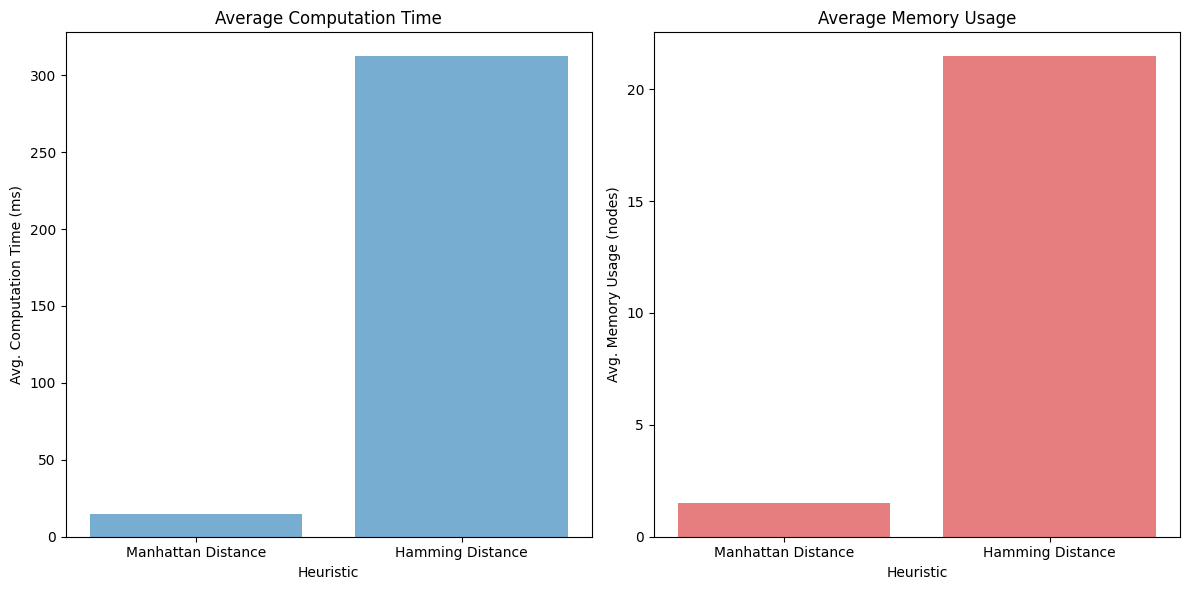

In [53]:
visualize_results(summary)